In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
train_dir = 'train/'
test_dir = 'test/'

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary')

Found 131 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [12]:
egitim = model.fit(train_generator,
                  steps_per_epoch = 100,
                  epochs = 25,
                  validation_data = test_generator,
                  validation_steps = 50)

Epoch 1/25


C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 16/100 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.6054 - loss: 0.6588

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6447 - loss: 0.6007 - val_accuracy: 0.7481 - val_loss: 0.4845
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7692 - loss: 0.4783 - val_accuracy: 0.7710 - val_loss: 0.4862
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7405 - loss: 0.5087 - val_accuracy: 0.7252 - val_loss: 0.4778
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7778 - loss: 0.4643 - val_accuracy: 0.7557 - val_loss: 0.4333
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7993 - loss: 0.3898 - val_accuracy: 0.8168 - val_loss: 0.3282
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8443 - loss: 0.3043 - val_accuracy: 0.8626 - val_loss: 0.2788
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8814 - loss: 0.2660 - val_accuracy: 0.8855 - val_loss: 0.2012
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9064 - loss: 0.2033 - val_accuracy: 0.893

In [13]:
import matplotlib.pyplot as plt

acc = egitim.history['accuracy']
val_1 = egitim.history['val_accuracy']
loss = egitim.history['loss']
val_2 = egitim.history['val_loss']

In [14]:
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

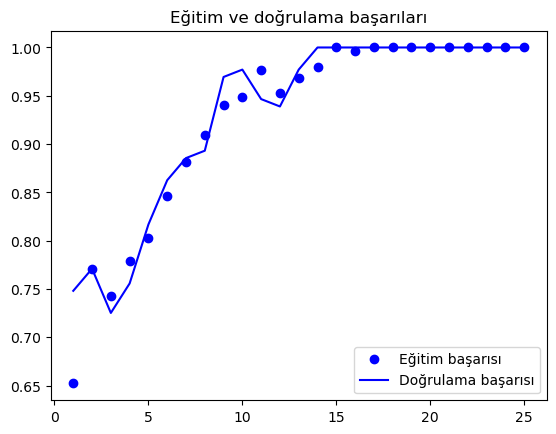

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epochs, acc, 'bo', label='Eğitim başarısı')
plt.plot(epochs, val_1, 'b', label='Doğrulama başarısı')
plt.title('Eğitim ve doğrulama başarıları')
plt.legend()

plt.figure()

<Figure size 640x480 with 0 Axes>

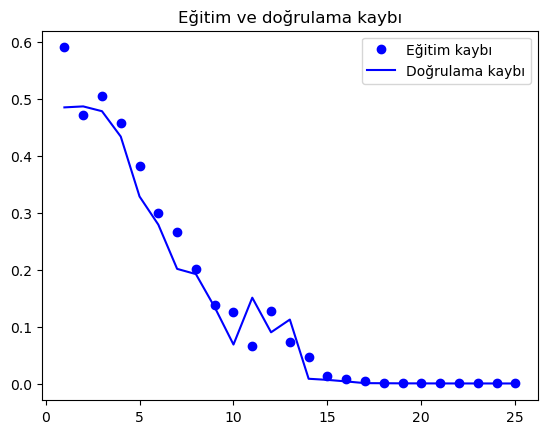

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_2, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulama kaybı')
plt.legend()

plt.figure()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


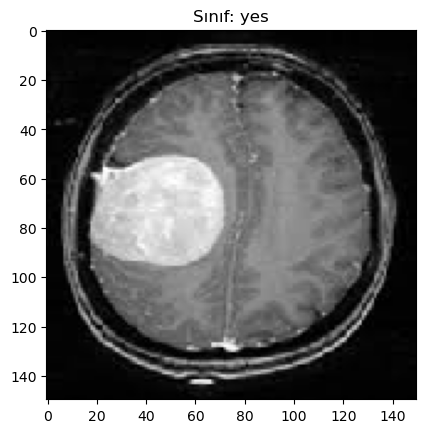

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

image_path = 'test/yes/Y1.jpg'
img = image.load_img(image_path, target_size = (150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)

img_array /= 255.0

prediction = model.predict(img_array)

if prediction < 0.5:
    predicted_class = 'no'
else:
    predicted_class = 'yes'
    
plt.imshow(img)
plt.title('Sınıf: '+ predicted_class)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


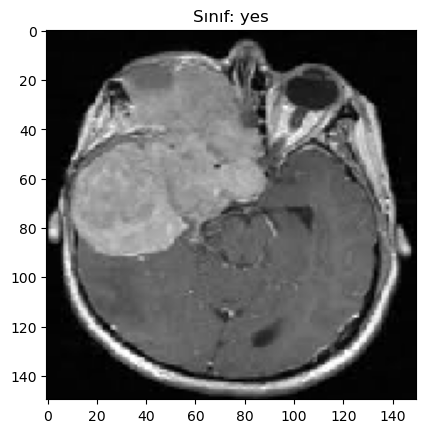

In [26]:
image_path = 'test/yes/Y106.jpg'
img = image.load_img(image_path, target_size = (150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)

img_array /= 255.0

prediction = model.predict(img_array)

if prediction < 0.5:
    predicted_class = 'no'
else:
    predicted_class = 'yes'
    
plt.imshow(img)
plt.title('Sınıf: '+ predicted_class)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


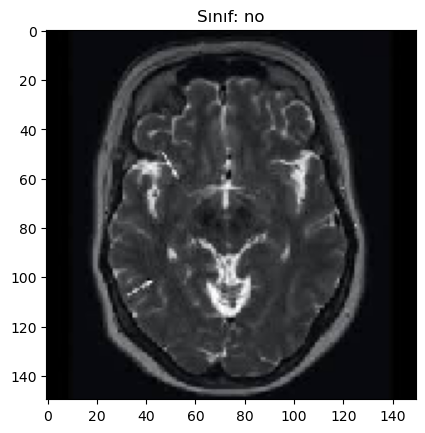

In [27]:
image_path = 'test/no/3 no.jpg'
img = image.load_img(image_path, target_size = (150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)

img_array /= 255.0

prediction = model.predict(img_array)

if prediction < 0.5:
    predicted_class = 'no'
else:
    predicted_class = 'yes'
    
plt.imshow(img)
plt.title('Sınıf: '+ predicted_class)
plt.show()

In [28]:
train_accuracy = egitim.history['accuracy'][-1]
test_accuracy = egitim.history['val_accuracy'][-1]

In [29]:
print("Eğitim doğruluğu:", train_accuracy)
print("Test doğruluğu:", test_accuracy)

Eğitim doğruluğu: 1.0
Test doğruluğu: 1.0
